# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

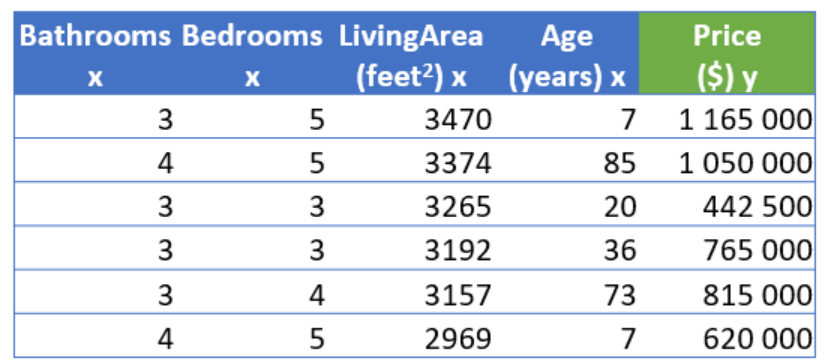

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [20]:
import pandas as pd 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [22]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

In [23]:
# 1. Základní charakteristiky dat
print("=== Náhled dat ===")
print(data.head())

print("\n=== Základní statistiky ===")
print(data.describe())

print("\n=== Kontrola chybějících hodnot ===")
print(data.isna().sum())

=== Náhled dat ===
   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000

=== Základní statistiky ===
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06

=== Kontrola chybějících hodnot ===
bathrooms

## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

In [24]:
# 2. Analýza distribuce dat
numeric_cols = data.select_dtypes(include=[np.number]).columns


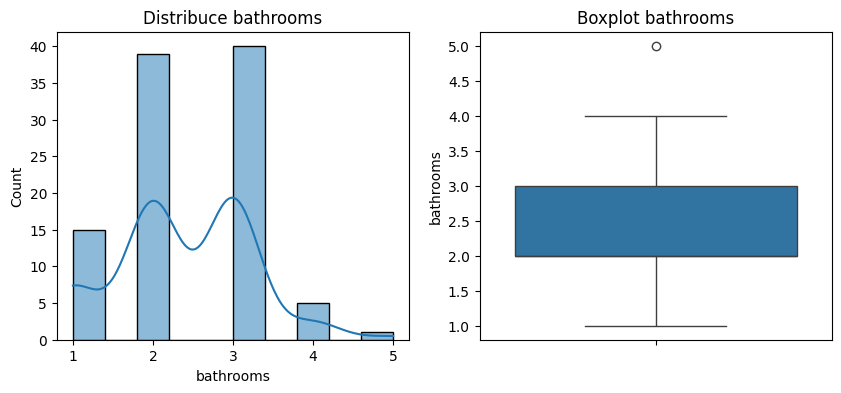

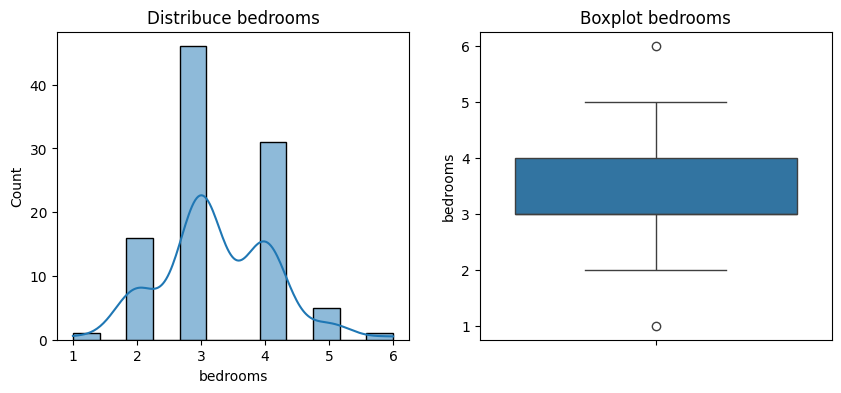

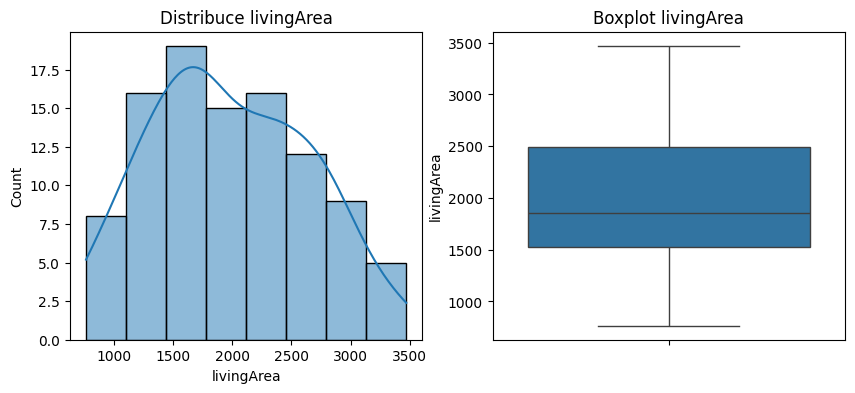

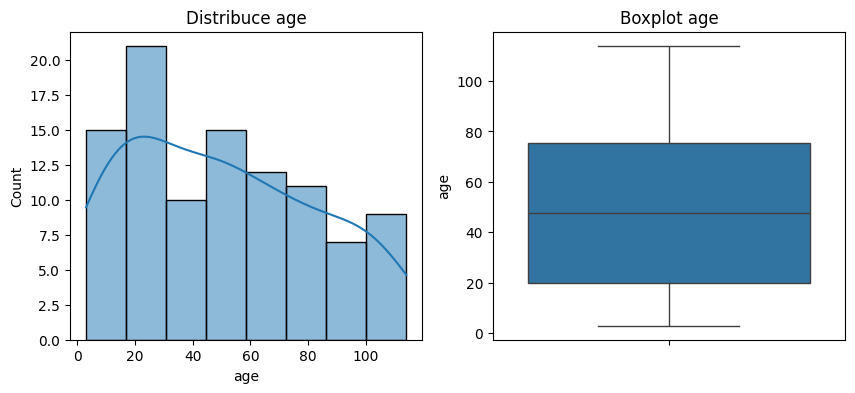

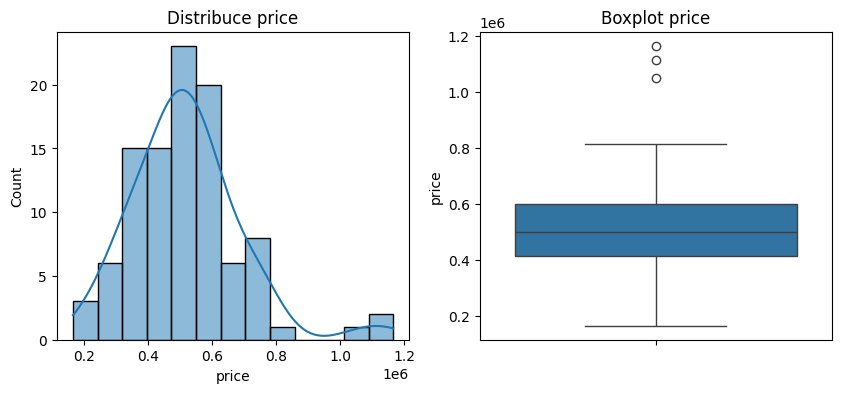

In [25]:
# Histogramy a boxploty pro každou numerickou proměnnou
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribuce {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot {col}')
    plt.show()

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

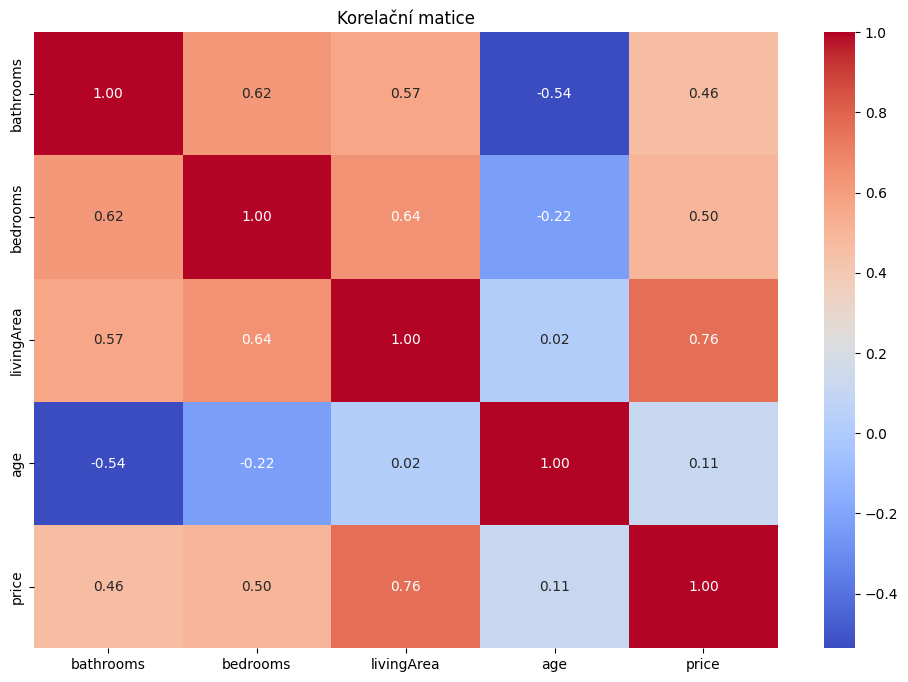


=== Korelace s cenou (price) ===
price         1.000000
livingArea    0.759973
bedrooms      0.498934
bathrooms     0.463856
age           0.114328
Name: price, dtype: float64


In [26]:
# 3. Analýza vztahů mezi proměnnými
# Korelační matice
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelační matice')
plt.show()

# Výběr proměnných s vysokou korelací s cenou (příklad)
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("\n=== Korelace s cenou (price) ===")
print(price_corr)

# Předpokládáme, že vybereme top 3 proměnné
selected_features = ['bathrooms', 'bedrooms', 'price']  # Upravte podle skutečných dat

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

Důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

In [27]:
# 4. Standardizace dat
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[selected_features] = scaler.fit_transform(data[selected_features])


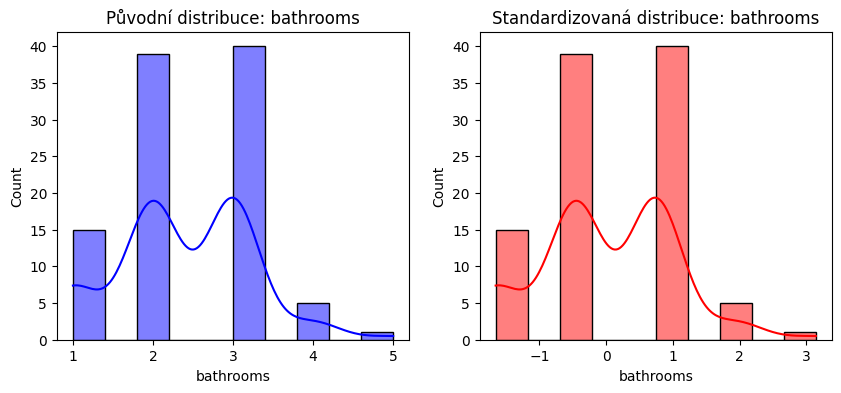

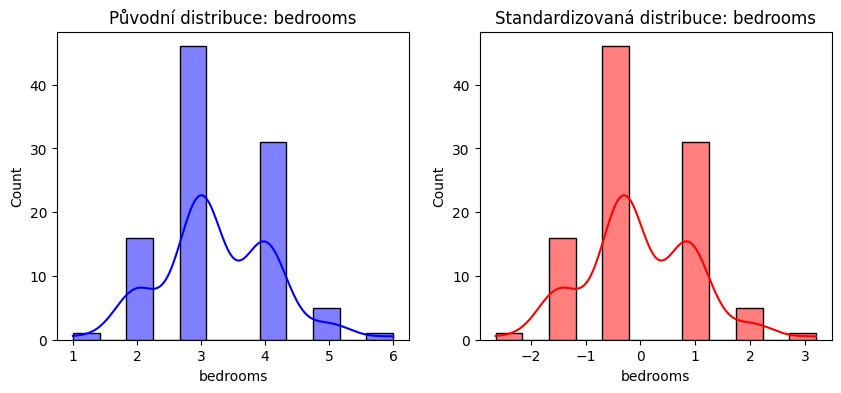

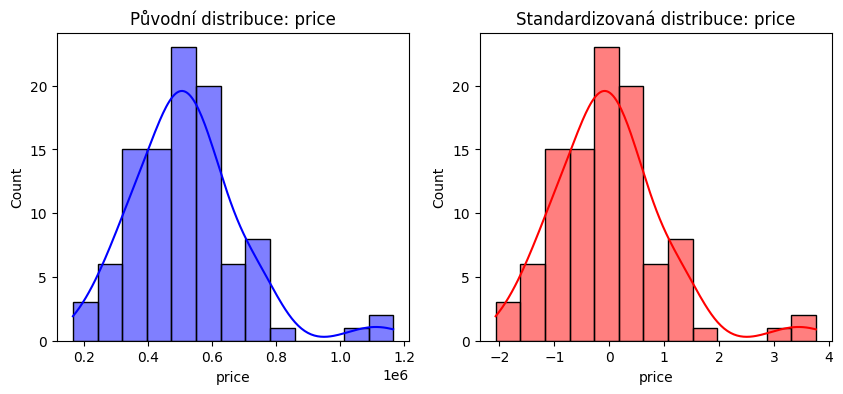

In [28]:
# Vizualizace před a po standardizaci
for feature in selected_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color='blue', label='Původní')
    plt.title(f'Původní distribuce: {feature}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data_standardized[feature], kde=True, color='red', label='Standardizované')
    plt.title(f'Standardizovaná distribuce: {feature}')
    plt.show()